In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

import seaborn as sns

[900, 1225] 1.2520737537315352 1.363295914258677
0.0011249487361512523
[900, 2500] 1.2703793021116976 1.3623381100960903
0.0004456358473205179
[1225, 2500] 1.2814033067811939 1.3619850043070956
0.0005817593287298511
[1225, 3600] 1.2708502827328116 1.3624567562157357
0.00035871498076829833
[1600, 2500] 1.2493260358306337 1.3630375490261668
0.0009682299303327317
[1600, 3600] 1.2511553414782253 1.3629621506436338
0.0004751868180208019
[2500, 3600] 1.2526252824787152 1.3629268137399606
0.0008577180244164026
[1225, 4900] 1.2633660890604845 1.362791466238341
0.0004928181858256047
[1600, 4900] 1.2461104602786721 1.363161837161089
0.0005755084902233967
[2500, 4900] 1.2453468699119992 1.3631761691948991
0.0008204604092816575


Text(0.5, 0, 'J')

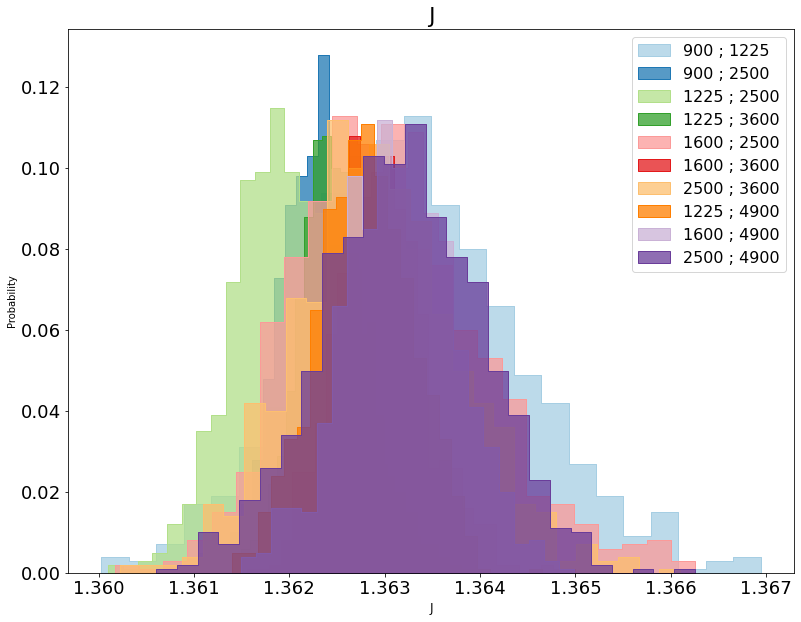

In [9]:
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


J_min = 1.34
J_max = 1.38
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>J_min]

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

#pairs = [[900,1225], [900, 2500], [1225,2500], [1225, 3600], [1600, 2500], [1600,3600], [2500,3600], [1225, 4900],
         #[1600,4900], [2500,4900], [3600,4900] ]
 
pairs = [  [1600, 2500], [1600,3600], [2500,3600], [1225, 4900],
         [1600,4900], [2500,4900],[3600,4900] ]
pairs = [[900,1225], [900, 2500], [1225,2500], [1225, 3600], [1600, 2500], [1600,3600], [2500,3600], [1225, 4900],
          [1600,4900], [2500,4900]  ] 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
plt.title("J",fontsize=22)
c = 0 
#custom_palette =sns.color_palette("RdPu",  len(pairs)) #sns.color_palette("Paired", len(pairs))
#sns.set_palette("Paired")
custom_palette = sns.color_palette("Paired", len(pairs))

L_plot = []
BC_plot = []
err_plot = []
J_plot = []
J_err_plot = []

nu = 4/7
for pair in pairs:
    
     
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
    bc_1 = []
    errs_1=[]
    bc_2 = []
    errs_2 = []    
    
    crit_J = []
    crit_bc = []
    for step in range(1000):
        bc_1 = []
        errs_1=[]
        bc_2 = []
        errs_2 = [] 
        J_l1 =  np.unique(data_l1[:, 1])
        for J in J_l1 :

            data_l = data_l1[data_l1[:,1]==J]
            ind = np.argmin(data_l[:, 4])
            data_l = data_l[ind, :]
            r2 = norm.rvs(data_l[3], data_l[4], size =  10 )
            #m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            #cum_1 = 1 - m4/3/m2/m2

            cum_1 = r2/np.power(pair[0], 2*nu)
            bc_1.append(np.mean(cum_1))
            errs_1.append(np.std(cum_1))

        J_l2 =  np.unique(data_l2[:, 1])
        for J in J_l2 :
            data_l = data_l2[data_l2[:,1]==J]
            ind = np.argmin(data_l[:, 4])
            data_l = data_l[ind, :]
            r2 = norm.rvs(data_l[3], data_l[4], size =  10 )
            #m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            #cum_2 = 1 - m4/3/m2/m2
            
            cum_2 = r2/np.power(pair[1], 2*nu)
            bc_2.append(np.mean(cum_2))
            errs_2.append(np.std(cum_2))
            
 
            
        #print(J_l1, bc_1)
        cov1 = np.zeros((len(bc_1), len(bc_1)))
        np.fill_diagonal(cov1, np.square(errs_1))
        cov2 = np.zeros((len(bc_2), len(bc_2)))
        np.fill_diagonal(cov2, np.square(errs_2))
        
        A1 = np.vstack([J_l1, np.ones(len(J_l1))]).T
        m1, c1 = np.linalg.lstsq(A1, bc_1, rcond=None)[0]
        
        #print(cov1.shape, A1.shape)
        CovMatrix = cov1
        X = A1
        CovMatrix_inv = np.linalg.inv(CovMatrix)
        X_transose = X.transpose()
        X_t_Cov = X_transose.dot(CovMatrix_inv) #np.matmul(X_transose, CovMatrix)
        First_part = X_t_Cov.dot(X) 
        First_part_inv =  np.linalg.inv(First_part  )
        FP_X_t = First_part_inv.dot(X_transose)
        y = bc_1
        Result = np.matmul( FP_X_t.dot(CovMatrix_inv), y )
        #print(Result, m1, c1)
        m1, c1 = Result
        
        
        A2 = np.vstack([J_l2, np.ones(len(J_l2))]).T
        m2, c2 = np.linalg.lstsq(A2, bc_2, rcond=None)[0]
        
        CovMatrix = cov2
        X = A2
        CovMatrix_inv = np.linalg.inv(CovMatrix)
        X_transose = X.transpose()
        X_t_Cov = X_transose.dot(CovMatrix_inv) #np.matmul(X_transose, CovMatrix)
        First_part = X_t_Cov.dot(X) 
        First_part_inv =  np.linalg.inv(First_part  )
        FP_X_t = First_part_inv.dot(X_transose)
        y = bc_2
        Result = np.matmul( FP_X_t.dot(CovMatrix_inv), y )
        #print(Result, m1, c1)
        m2, c2 = Result        
        
        
        A = np.array([[1, -m1], [1, -m2]])
        b = np.array([c1, c2])
        
        xy = np.dot(np.linalg.inv(A),b)
        
        crit_bc.append(xy[0])
        crit_J.append(xy[1])
 

    print(pair, np.mean(crit_bc),np.mean(crit_J))
    print(np.std(crit_J))
    #print(np.mean(crit_J))
    if 3600 in pair:
        if (pair[0]==3600):
            L_plot.append(pair[1])
        else:
            L_plot.append(pair[0])
        BC_plot.append(np.mean(crit_bc))
        err_plot.append(np.std(crit_bc))
        J_plot.append(np.mean(crit_J))
        J_err_plot.append(np.std(crit_J))
    
    sns.histplot(data=crit_J,label = str(pair[0])+ " ; " +str(pair[1]), color=custom_palette[c],stat="probability",multiple="stack",element="step" )
    c+=1
 
ax.legend(fontsize=16)
plt.tick_params(axis='x', labelsize=18) 
plt.tick_params(axis='y', labelsize=18)
plt.xlabel("J", fontsize=12)
#plt.xlim(left=1.295,right=1.32)
#plt.savefig("Thesis/Images/radius_hist_cov.png")

In [10]:
np.mean(crit_bc)

1.2453468699119992

In [11]:
A2 = np.vstack([1/np.array(L_plot), np.ones(len(1/np.array(L_plot)))]).T
m2, c2 = np.linalg.lstsq(A2, BC_plot, rcond=None)[0]

m1, c1 = m2, c2

A2 = np.vstack([1/np.array(L_plot), np.ones(len(1/np.array(L_plot)))]).T
m2, c2 = np.linalg.lstsq(A2, J_plot, rcond=None)[0]

m2, c2

(-1.0916621214292033, 1.3634519423419937)

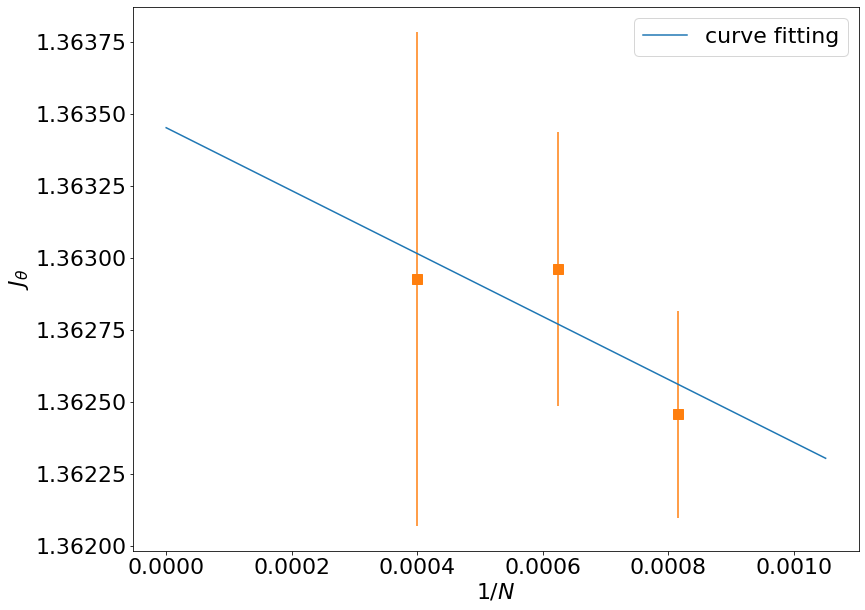

In [12]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

xfit = np.array([0,0.0010511])
jfit = c2+m2*xfit
plt.plot(xfit,jfit, label = "curve fitting")

xfit = np.array([0,0.001020511])
jfit = c1+m1*xfit
 

plt.errorbar(1/np.array(L_plot), J_plot, yerr=J_err_plot, fmt="s", ms = 10 )
plt.xlabel(r"$1/N$", fontsize = 22)
plt.ylabel(r"$J_{\theta}$", fontsize = 22)
#axes[1].set_xlim([0,0.0011])

plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 

plt.legend(fontsize=22) 
#plt.savefig("Thesis/Images/criticalr2_4900.png", bbox_inches='tight') 

In [13]:
from scipy.stats import linregress

result = linregress(1/np.array(L_plot), J_plot)
print(result.intercept, result.intercept_stderr)

1.3634519423419942 0.0005100795988270168


[900, 2500]
[1600, 2500]
[900, 2916]
[1225, 3600]
[1600, 3600]
[2500, 3600]
[1225, 4900]
[1600, 4900]
[2500, 4900]


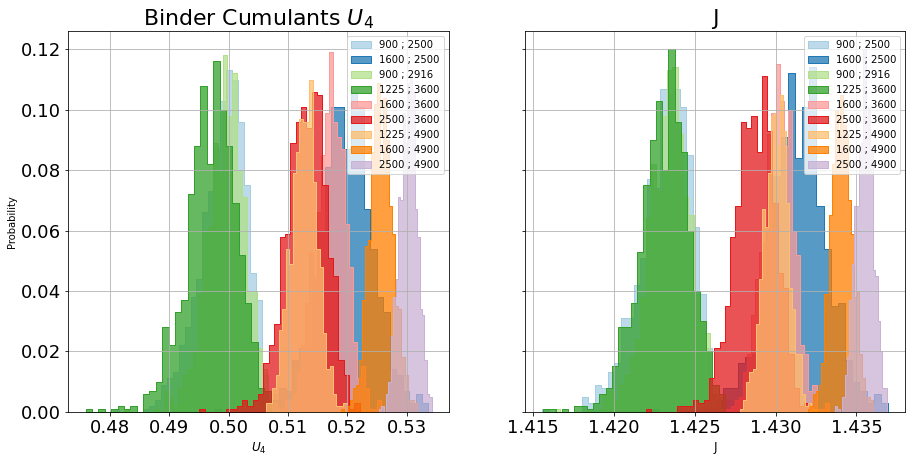

In [53]:
 

data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

J_min = 1.42
J_max = 1.45
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
 
    
pairs = [[900,2500],  [1600, 2500], [900,2916], [1225,3600],[1600,3600], [2500,3600], [1225, 4900],
         [1600,4900], [2500,4900] ]

fig, axs = plt.subplots(1,  2, figsize=(15, 7), sharey=True)
axs[0].set_title("Binder Cumulants " + r"$U_4$", fontsize=22)
axs[1].set_title("J",fontsize=22)
c = 0 
#custom_palette =sns.color_palette("RdPu",  len(pairs)) #sns.color_palette("Paired", len(pairs))
#sns.set_palette("Paired")
custom_palette = sns.color_palette("Paired", len(pairs))

L_plot = []
BC_plot = []
err_plot = []
J_plot = []
J_err_plot = []


for pair in pairs:
    
     
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
    #print(data_l1)
    if(len(data_l1)<2): continue
    if(len(data_l2)<2): continue
        
    print(pair)
        
    bc_1 = []
    errs_1=[]
    bc_2 = []
    errs_2 = []    
    
    crit_J = []
    crit_bc = []
    for step in range(1000):
        bc_1 = []
        errs_1=[]
        bc_2 = []
        errs_2 = [] 
        J_l1 =  np.unique(data_l1[:, 1])
        for J in J_l1 :

            data_l = data_l1[data_l1[:,1]==J]
             
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[17], data_l[18], size =  100  )
            m4 = norm.rvs(data_l[19], data_l[20], size =  100  )
            cum_1 = 1 - m4/3/m2/m2
            bc_1.append(np.mean(cum_1))
            errs_1.append(np.std(cum_1))
            
            if(np.std(cum_1)>0.08): continue

        J_l2 =  np.unique(data_l2[:, 1])
        for J in J_l2 :
            data_l = data_l2[data_l2[:,1]==J]
             
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[17], data_l[18], size =  100  )
            m4 = norm.rvs(data_l[19], data_l[20], size =  100  )
            cum_2 = 1 - m4/3/m2/m2
            bc_2.append(np.mean(cum_2))
            errs_2.append(np.std(cum_2))
            
            if(np.std(cum_2)>0.08): continue
            
        #print(J_l, cum_1)
        cov1 = np.zeros((len(bc_1), len(bc_1)))
        np.fill_diagonal(cov1, np.square(errs_1))
        cov2 = np.zeros((len(bc_2), len(bc_2)))
        np.fill_diagonal(cov2, np.square(errs_2))
        
        A1 = np.vstack([J_l1, np.ones(len(J_l1))]).T
        m1, c1 = np.linalg.lstsq(A1, bc_1, rcond=None)[0]
        
        #print(cov1.shape, A1.shape)
        CovMatrix = cov1
        X = A1
        CovMatrix_inv = np.linalg.inv(CovMatrix)
        X_transose = X.transpose()
        X_t_Cov = X_transose.dot(CovMatrix_inv) #np.matmul(X_transose, CovMatrix)
        First_part = X_t_Cov.dot(X) 
        First_part_inv =  np.linalg.inv(First_part  )
        FP_X_t = First_part_inv.dot(X_transose)
        y = bc_1
        Result = np.matmul( FP_X_t.dot(CovMatrix_inv), y )
        #print(Result, m1, c1)
        m1, c1 = Result
        
        
        A2 = np.vstack([J_l2, np.ones(len(J_l2))]).T
        m2, c2 = np.linalg.lstsq(A2, bc_2, rcond=None)[0]
        
        CovMatrix = cov2
        X = A2
        CovMatrix_inv = np.linalg.inv(CovMatrix)
        X_transose = X.transpose()
        X_t_Cov = X_transose.dot(CovMatrix_inv) #np.matmul(X_transose, CovMatrix)
        First_part = X_t_Cov.dot(X) 
        First_part_inv =  np.linalg.inv(First_part  )
        FP_X_t = First_part_inv.dot(X_transose)
        y = bc_2
        Result = np.matmul( FP_X_t.dot(CovMatrix_inv), y )
        #print(Result, m1, c1)
        m2, c2 = Result        
        
        
        A = np.array([[1, -m1], [1, -m2]])
        b = np.array([c1, c2])
        
        xy = np.dot(np.linalg.inv(A),b)
        
        crit_bc.append(xy[0])
        crit_J.append(xy[1])
     
    if 3600 in pair:
        if (pair[0]==3600):
            L_plot.append(pair[1])
        else:
            L_plot.append(pair[0])
        BC_plot.append(np.mean(crit_bc))
        err_plot.append(np.std(crit_bc))
        J_plot.append(np.mean(crit_J))
        J_err_plot.append(np.std(crit_J))
    
    sns.histplot(data=crit_bc,label = str(pair[0])+ " ; " +str(pair[1]), ax=axs[0], color=custom_palette[c],stat="probability",multiple="stack",element="step" )
    sns.histplot(data=crit_J,label = str(pair[0])+ " ; " +str(pair[1]), ax=axs[1], color=custom_palette[c],stat="probability",multiple="stack",element="step" )
    c+=1
    #axs[0].set_xlim()
 
axs[0].legend()
axs[1].legend() 
axs[0].grid()
axs[1].grid()
axs[0].tick_params(axis='x', labelsize=18) 
axs[0].tick_params(axis='y', labelsize=18) 
axs[1].tick_params(axis='x', labelsize=18) 
axs[1].tick_params(axis='y', labelsize=18)
axs[0].set_xlabel(r"$U_4$", fontsize=12)
axs[1].set_xlabel("J", fontsize=12)

axs[0].set_xlim()
axs[1].set_xlim()
plt.savefig("Thesis/Images/bc_cov.png")

In [54]:
A2 = np.vstack([1/np.array(L_plot), np.ones(len(1/np.array(L_plot)))]).T
m2, c2 = np.linalg.lstsq(A2, BC_plot, rcond=None)[0]

m1, c1 = m2, c2

A2 = np.vstack([1/np.array(L_plot), np.ones(len(1/np.array(L_plot)))]).T
m2, c2 = np.linalg.lstsq(A2, J_plot, rcond=None)[0]

m2, c2

(-12.864303889740244, 1.4351999957014199)

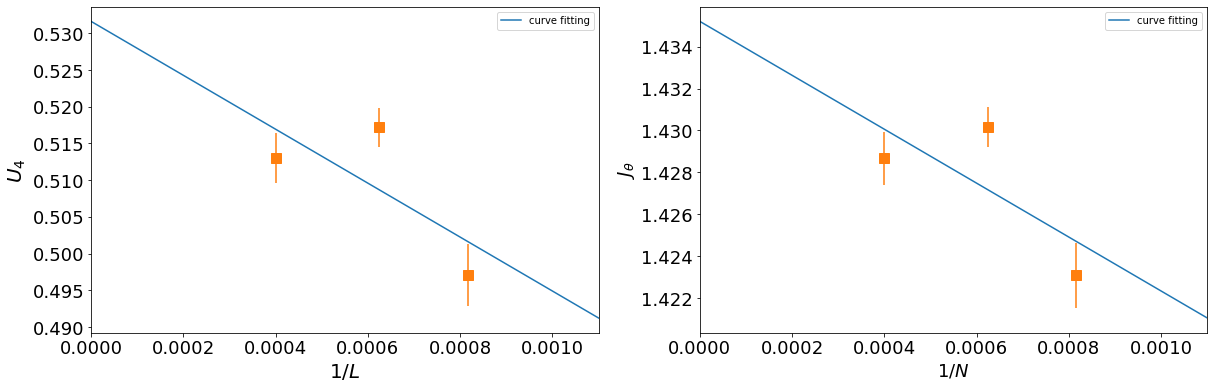

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20,6)) #,  sharey='row')
axes = axes.reshape(-1)

xfit = np.array([0,0.0011])
jfit = c2+m2*xfit
axes[1].plot(xfit,jfit, label = "curve fitting")

xfit = np.array([0,0.0011])
jfit = c1+m1*xfit
axes[0].plot(xfit,jfit, label = "curve fitting")

axes[0].errorbar(1/np.array(L_plot), BC_plot, yerr=err_plot, fmt="s", ms = 10 )
axes[0].set_xlabel(r"$1/L$", fontsize = 20)
axes[0].set_ylabel(r"$U_4$", fontsize = 20)
axes[0].set_xlim([0,0.0011])

axes[1].errorbar(1/np.array(L_plot), J_plot, yerr=J_err_plot, fmt="s", ms = 10 )
axes[1].set_xlabel(r"$1/N$", fontsize = 18)
axes[1].set_ylabel(r"$J_{\theta}$", fontsize = 18)
axes[1].set_xlim([0,0.0011])

axes[0].tick_params(axis='x', labelsize=18) 
axes[0].tick_params(axis='y', labelsize=18) 
axes[1].tick_params(axis='x', labelsize=18) 
axes[1].tick_params(axis='y', labelsize=18)


axes[0].legend()
axes[1].legend()
#plt.savefig("/home/kamilla/Lattice_models/img/critical.png") 
plt.savefig("Thesis/Images/criticalu4_4900.png", bbox_inches='tight') 

In [56]:
from scipy.stats import linregress

result = linregress(1/np.array(L_plot), J_plot)
print(result.intercept, result.intercept_stderr)

1.43519999570142 0.007920367537350858


In [57]:
from scipy.stats import linregress

result = linregress(1/np.array(L_plot), BC_plot)
print(result.intercept, result.intercept_stderr)

0.5316080931889993 0.022551524005321566
